<hr></hr>

  <h1 style="margin-top:0; color:#2c3e50;">Bike Store Sales</h1>

<img src="https://img1.wsimg.com/isteam/ip/d500fdfd-dd71-4794-8918-f7fc0291936a/B69756EF-0E93-417C-B980-3BB50D7D2374.jpeg"
     alt="Bike Store"
     style="float:right; width:250px; border-radius:8px; margin-left:15px;">


<hr style="border: none; height: 8px; background: linear-gradient(to right, #a100ff, #00d9ff); border-radius: 4px;">


<h1 style="font-size:36px;font-weight:bold;">Hands on!</h1>


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<hr style="border:none;height:8px;background:linear-gradient(to right,#00c6ff,#00ffcc);border-radius:4px;">


<h1 style="font-size:32px;font-weight:bold;">Loading the data:</h1>


In [5]:
!type "C:\Users\Admin\Downloads\sales_data.csv" 

Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
2014-05-22,22,May,2014,4

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [6]:
sales = pd.read_csv(r"C:\Users\Admin\Downloads\sales_data.csv", parse_dates=["Date"])

<hr style="border:none;height:8px;background:linear-gradient(to right,#00c6ff,#00ffcc);border-radius:4px;">


<h1 style="font-size:32px;font-weight:bold;">The data glance:</h1>

In [7]:
sales.head()

Date  Day     Month  Year  Customer_Age       Age_Group  \
0 2013-11-26   26  November  2013            19     Youth (<25)   
1 2015-11-26   26  November  2015            19     Youth (<25)   
2 2014-03-23   23     March  2014            49  Adults (35-64)   
3 2016-03-23   23     March  2016            49  Adults (35-64)   
4 2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike               8         45         120     590   360   
1  Hitch Rack - 4-Bike               8         45         120     590   360   
2  Hitch Rack - 4-Bike              23         45         120    1366  1035   
3  Hitch Rack - 4-Bike              20         45         120    1188   900   
4  Hitch Rack - 4-Bike               4         45         120     238   180   

   Revenue  
0      950  
1      950  
2     2401  
3     2088  
4      418

In [8]:
sales.shape

(113036, 18)

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [10]:
sales.describe()

Date            Day           Year  \
count                         113036  113036.000000  113036.000000   
mean   2014-11-23 12:14:55.063519232      15.665753    2014.401739   
min              2011-01-01 00:00:00       1.000000    2011.000000   
25%              2013-12-22 00:00:00       8.000000    2013.000000   
50%              2014-06-27 00:00:00      16.000000    2014.000000   
75%              2016-01-09 00:00:00      23.000000    2016.000000   
max              2016-07-31 00:00:00      31.000000    2016.000000   
std                              NaN       8.781567       1.272510   

        Customer_Age  Order_Quantity      Unit_Cost     Unit_Price  \
count  113036.000000   113036.000000  113036.000000  113036.000000   
mean       35.919212       11.901660     267.296366     452.938427   
min        17.000000        1.000000       1.000000       2.000000   
25%        28.000000        2.000000       2.000000       5.000000   
50%        35.000000       10.000000       9.000000      24.000000   
75%        43.000000       20.000000      42.000000      70.000000   
max        87.000000       32.000000    2171.000000    3578.000000   
std        11.021936        9.561857     549.835483     922.071219   

              Profit           Cost        Revenue  
count  113036.000000  113036.000000  113036.000000  
mean      285.051665     469.318695     754.370360  
min       -30.000000       1.000000       2.000000  
25%        29.000000      28.000000      63.000000  
50%       101.000000     108.000000     223.000000  
75%       358.000000     432.000000     800.000000  
max     15096.000000   42978.000000   58074.000000  
std       453.887443     884.866118    1309.094674

<hr style="border:none;height:8px;background:linear-gradient(to right,#00c6ff,#00ffcc);border-radius:4px;">


<h1 style="font-size:32px;font-weight:bold;">Numerical analysis and visualization
</h1>

<p>We'll analyze the <span style="background-color:#e0e0e0; padding:2px 5px; border-radius:4px;"><code>Unit_Cost</code></span> column:</p>


In [11]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [12]:
 sales['Unit_Cost'].mean()

np.float64(267.296365759581)

In [13]:
 sales['Unit_Cost'].median()

9.0

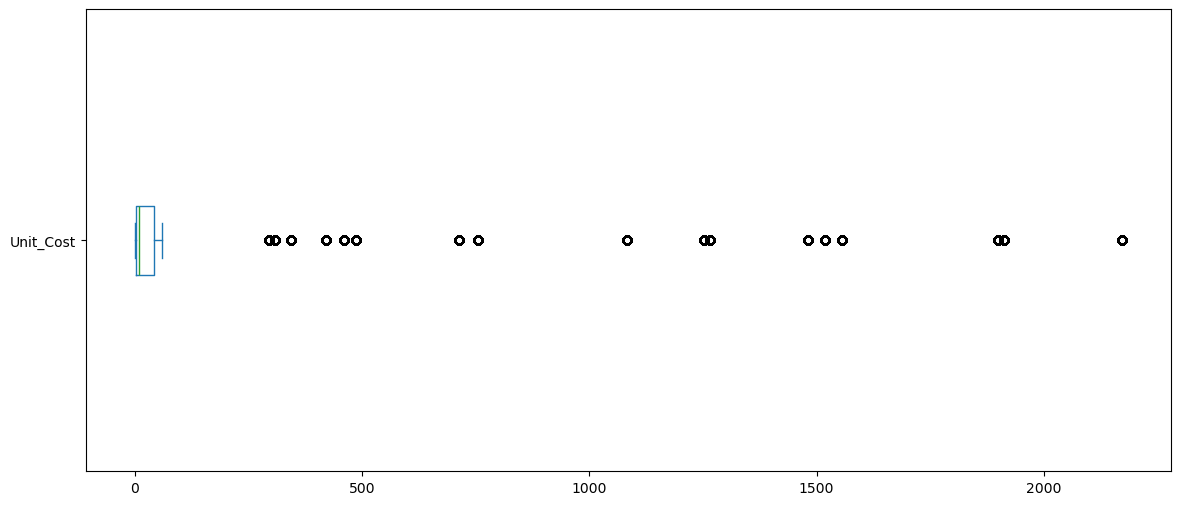

In [14]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))
plt.show()

# What I can see ?
# The Unit_Cost distribution is right-skewed — most products are low-cost, 
# with a few high-cost outliers. The median represents the typical cost better than the mean. 
# Outliers may indicate premium products or data issues. 
# A log transformation could help normalize the data for further analysis.

In [15]:
sales['Log_Unit_Cost']=np.log(sales['Unit_Cost']+1)

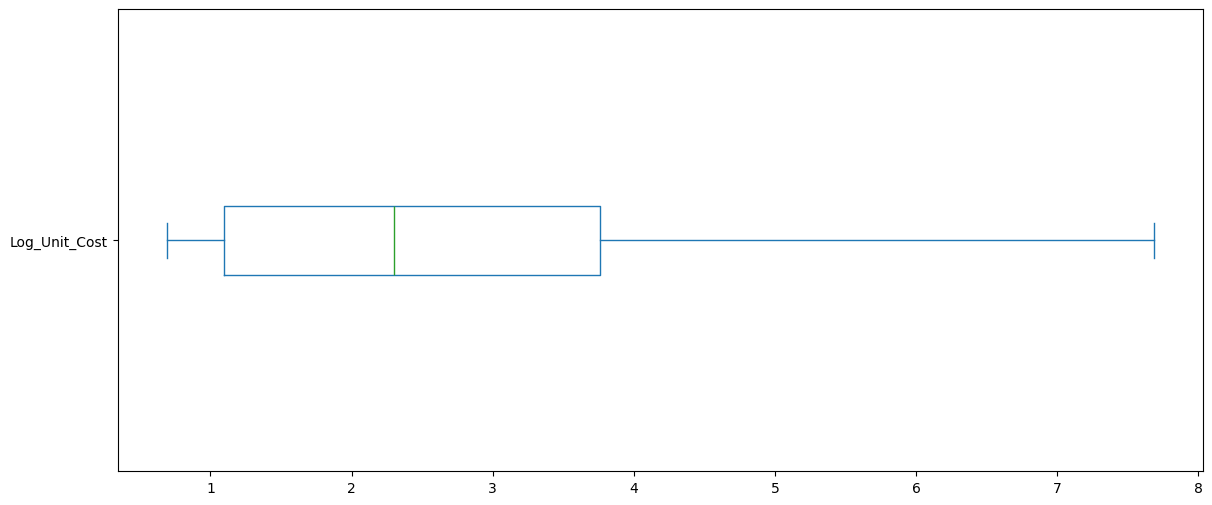

In [16]:
sales['Log_Unit_Cost'].plot(kind='box' , vert = False , figsize =(14,6))
plt.show()

# Applied log transformation to reduce right skewness in Unit_Cost.
# This helps compress large values, making the distribution more symmetrical.
# It improves visibility of lower-cost products and prepares the data for accurate statistical analysis 

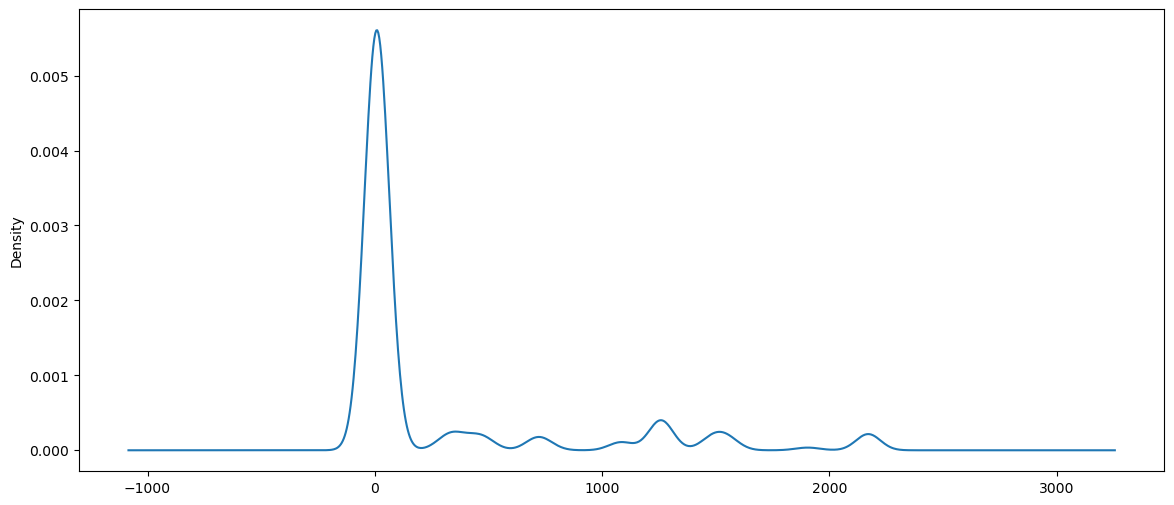

In [17]:
sales['Unit_Cost'].plot(kind = 'density' , figsize =(14,6)) # kde (Kernel Density Estimation plot)
plt.show()

# The KDE curve shows the distribution of Unit_Cost values.
# Most products have low costs, with a long right tail indicating a few expensive items.

In [18]:
sales[sales['Unit_Cost'] < 0]
# The curve near -1000 is just a smoothing side effect, not an actual data problem.

Empty DataFrame
Columns: [Date, Day, Month, Year, Customer_Age, Age_Group, Customer_Gender, Country, State, Product_Category, Sub_Category, Product, Order_Quantity, Unit_Cost, Unit_Price, Profit, Cost, Revenue, Log_Unit_Cost]
Index: []

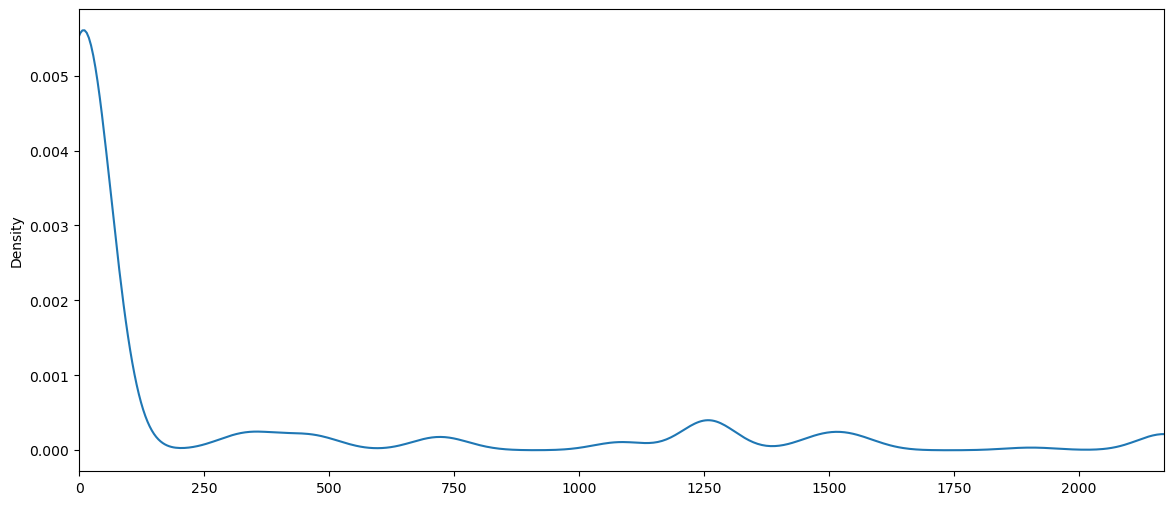

In [19]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6))
ax.set_xlim(0, sales['Unit_Cost'].max())  # start from 0  | remove negative areas
plt.show()

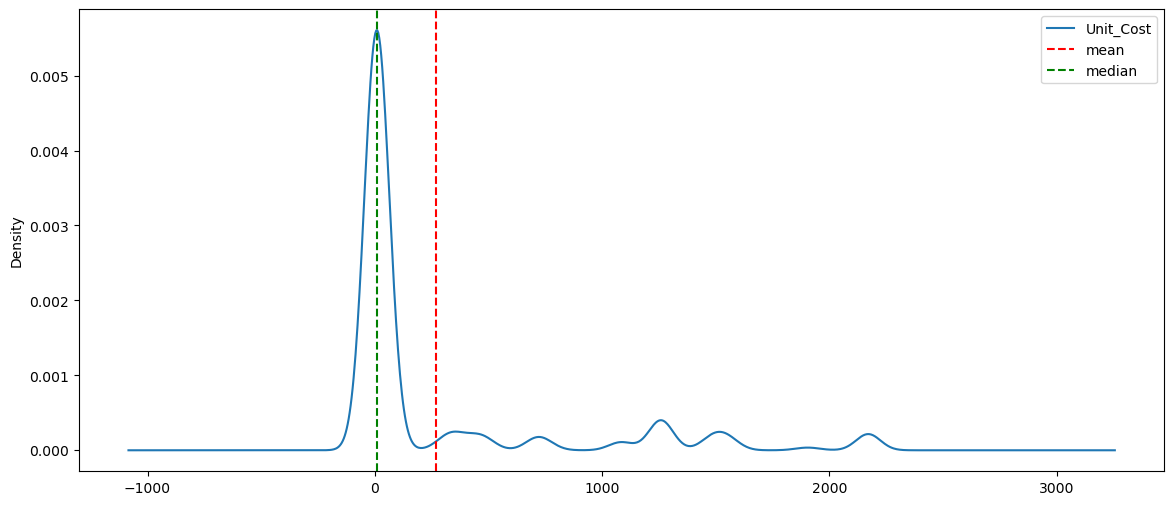

In [20]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6))
ax.axvline(sales['Unit_Cost'].mean(),color='red',linestyle ='--',label='mean')
ax.axvline(sales['Unit_Cost'].median(),color='green',linestyle ='--',label = 'median')
ax.legend()
plt.show()

#The KDE chart shows a right-skewed distribution, where most unit costs are low with a few high-cost outliers.
#The mean (red line) is slightly higher than the median (green line).
#This indicates that the average cost is influenced by a small number of expensive products.

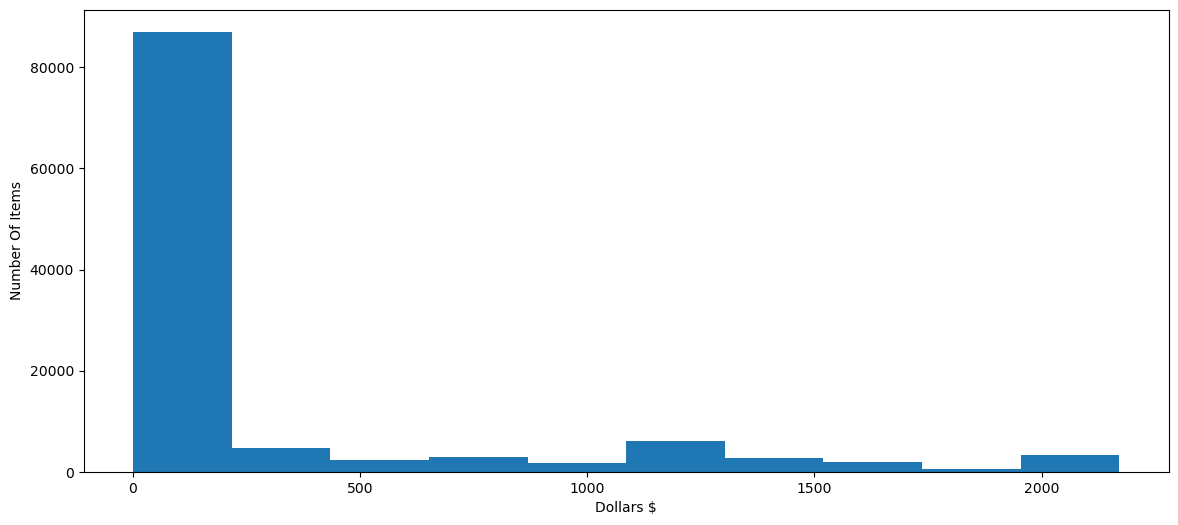

In [21]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number Of Items')
ax.set_xlabel('Dollars $')
plt.show()

#Tall bars on the left => many cheap items.
#Long tail on the right => few expensive items

<hr style="border:none;height:8px;background:linear-gradient(to right,#00c6ff,#00ffcc);border-radius:4px;">


<h1 style="font-size:32px;font-hight:bold;">Categorical analysis and visualization
</h1>

<p>We'll analyze the <span style="background-color:#e0e0e0; padding:2px 5px; border-radius:4px;"><code>Age_Group</code></span> column:</p>

In [22]:
sales.head()

Date  Day     Month  Year  Customer_Age       Age_Group  \
0 2013-11-26   26  November  2013            19     Youth (<25)   
1 2015-11-26   26  November  2015            19     Youth (<25)   
2 2014-03-23   23     March  2014            49  Adults (35-64)   
3 2016-03-23   23     March  2016            49  Adults (35-64)   
4 2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike               8         45         120     590   360   
1  Hitch Rack - 4-Bike               8         45         120     590   360   
2  Hitch Rack - 4-Bike              23         45         120    1366  1035   
3  Hitch Rack - 4-Bike              20         45         120    1188   900   
4  Hitch Rack - 4-Bike               4         45         120     238   180   

   Revenue  Log_Unit_Cost  
0      950       3.828641  
1      950       3.828641  
2     2401       3.828641  
3     2088       3.828641  
4      418       3.828641

In [23]:
sales['Age_Group'].value_counts()

Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

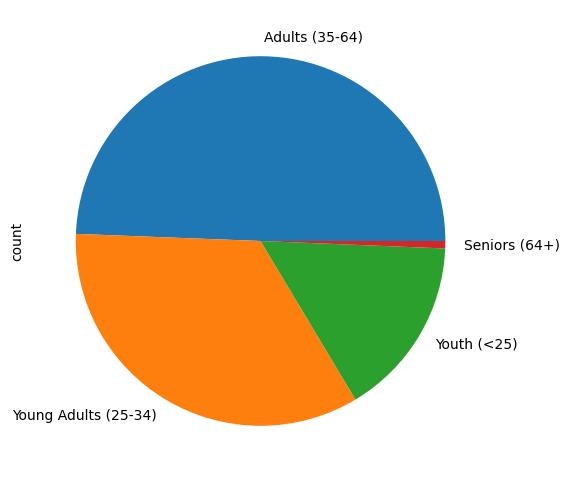

In [24]:
sales['Age_Group'].value_counts().plot(kind='pie' ,figsize=(6,6))
plt.show()

# Pie Chart Displays the percentage distribution of Age_Group

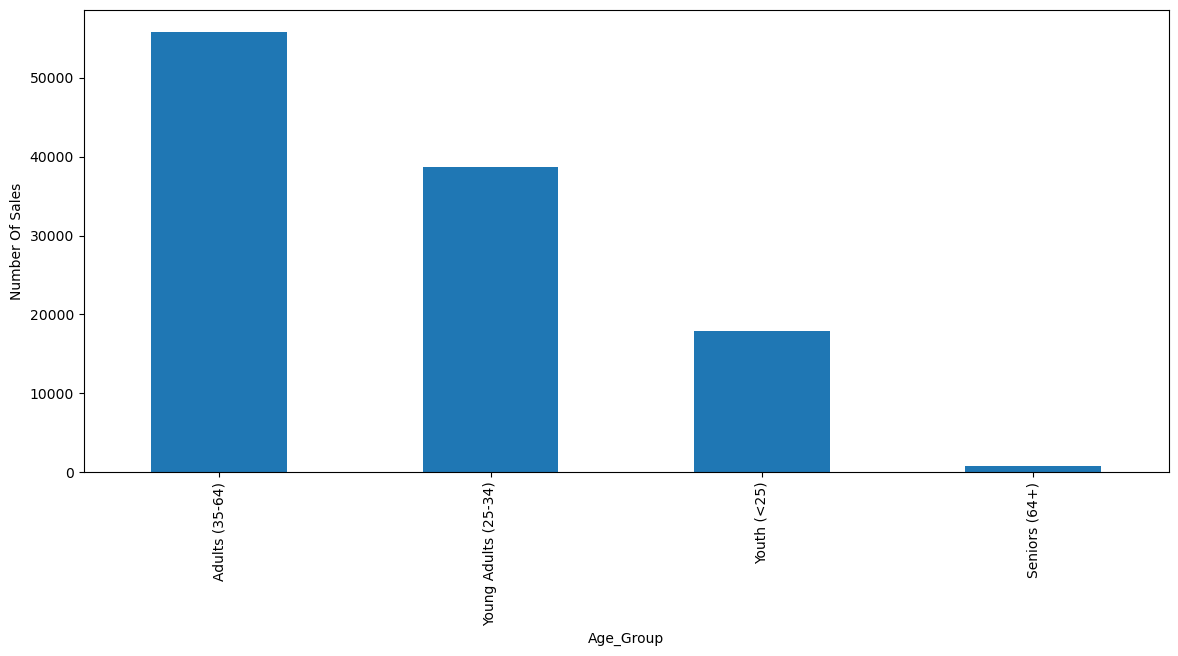

In [25]:
ax = sales['Age_Group'].value_counts().plot(kind='bar' ,figsize=(14,6))
ax.set_ylabel('Number Of Sales')
plt.show()

# Bar Chart identify which customer age group contributes most to total sales

<hr style="border:none;height:10px;background:linear-gradient(to right, #00c6ff,#00ffcc);border-radius:4px;">

<h1 style="font-size:32px;font-weight=bold;">Relationship between the columns?
</h1>

<p>Can we find any significant relationship?
</p>

In [26]:
sales.drop(columns=['Log_Unit_Cost'] , inplace=True)

In [27]:
correlation = sales.select_dtypes(include=['number']).corr()
correlation

#   What I Found ?
# - Unit_Cost and Unit_Price are high positive correlated (~0.99), meaning prices rise with cost.
# - Profit shows a strong positive correlation with both Revenue (~0.96) and Cost (~0.90),
#   means that higher sales increase both costs and profits
# - Order_Quantity has a moderate negative correlation with Unit_Cost and Unit_Price (~-0.5),
#   suggesting bulk purchases come with lower unit prices.
# - Customer_Age, Day, and Year show weak correlations with other variables,
#   indicating little linear relationship with sales metrics.


Day      Year  Customer_Age  Order_Quantity  Unit_Cost  \
Day             1.000000 -0.007635     -0.014296       -0.002412   0.003133   
Year           -0.007635  1.000000      0.040994        0.123169  -0.217575   
Customer_Age   -0.014296  0.040994      1.000000        0.026887  -0.021374   
Order_Quantity -0.002412  0.123169      0.026887        1.000000  -0.515835   
Unit_Cost       0.003133 -0.217575     -0.021374       -0.515835   1.000000   
Unit_Price      0.003207 -0.213673     -0.020262       -0.515925   0.997894   
Profit          0.004623 -0.181525      0.004319       -0.238863   0.741020   
Cost            0.003329 -0.215604     -0.016013       -0.340382   0.829869   
Revenue         0.003853 -0.208673     -0.009326       -0.312895   0.817865   

                Unit_Price    Profit      Cost   Revenue  
Day               0.003207  0.004623  0.003329  0.003853  
Year             -0.213673 -0.181525 -0.215604 -0.208673  
Customer_Age     -0.020262  0.004319 -0.016013 -0.009326  
Order_Quantity   -0.515925 -0.238863 -0.340382 -0.312895  
Unit_Cost         0.997894  0.741020  0.829869  0.817865  
Unit_Price        1.000000  0.749870  0.826301  0.818522  
Profit            0.749870  1.000000  0.902233  0.956572  
Cost              0.826301  0.902233  1.000000  0.988758  
Revenue           0.818522  0.956572  0.988758  1.000000

In [28]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=0)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

# In this heatmap
#  Blue => Positive correlation (variables increase together)
#  Red => Negative correlation (one increases while the other decreases)
#  Light color => Weak or no correlation (little relationship)  

# The heatmap shows strong positive correlations among Profit, Revenue, and Cost — 
# meaning profitability rises with higher sales and expenses. 
# Order_Quantity is negatively correlated with Unit_Price/Cost, suggesting bulk discounts. 
# Time and Customer_Age have little direct impact on financial metrics.

NameError: name 'corr' is not defined

In [ ]:
sales.plot(kind='scatter' , x='Customer_Age' , y='Revenue' , figsize=(6,6))
plt.show()

# The scatter plot shows that most revenue comes from customers aged 20–50. 
# Older customers (60+) generate less revenue, and there’s no clear correlation 
# between age and spending. A few high-value outliers exist around age 50.

In [ ]:
sales.plot(kind='scatter' , x='Revenue' , y='Profit' , figsize=(6,6))
plt.show()

# The scatter plot shows a clear positive relationship between Revenue and Profit — 
# higher sales generally lead to higher profits. A few outliers may indicate 
# exceptional or unprofitable transactions.

In [ ]:
ax = sales[['Profit','Age_Group']].boxplot(by='Age_Group',figsize=(10,6))
ax.set_ylabel('Profit')
plt.show()

# This box plot compares Profit distribution across different Age_Groups. 
# It helps identify which age segment generates the most profit 
# and highlights variations or outliers within each group.

In [ ]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
sales[boxplot_cols].plot(kind='box' , subplots=True , layout=(2,3) , figsize=(14,8))
plt.show()

In [ ]:
sales['Customer_Age'].value_counts()

In [ ]:
sales[sales['Profit']<0]

<hr style="border:none;height:10px;background:linear-gradient(to right , #00c6ff,#00ffcc);border-radius:4px;">

<h1 style="font-size:30px;font-weight:bold;">Column wrangling
</h1>

<p> We can also create new columns or modify existing ones.</p>

<p style="font-size: 16px; color: #34495e;">
  Add and calculate a new <strong>Revenue_per_Age</strong> column by dividing <em>Revenue</em> by <em>Customer_Age</em> for each entry in the dataset.
</p>

In [ ]:
sales['Revenue_Per_Age'] = sales['Revenue'] / sales['Customer_Age']
sales['Revenue_Per_Age'].head()

In [ ]:
sales['Revenue_Per_Age'].plot(kind='density'  , figsize=(14,6))
plt.show()

# The sharp peak indicates that most customers contribute a similar amount of revenue relative to their age,
# suggesting a dominant customer segment or consistent pricing model.
# The smooth curve helps identify the central tendency and spread, while any skew or tail could point to outliers—
# such as older customers with unusually high revenue impact.

<p style="font-size:18px;font-weight:bold;
    color:#34495e;">
  Add and calculate a new   <span style="background:gray;">
    <code><strong>Calculated_Cost</strong></code>
  </span>   column
</p>


<p>Use This Formula</p>

<p style="font-weight:bold; text-align:center;">
    <em>Calculated_Cost = Order_Quantity * Unit_Cost</em>
</p>


In [ ]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']
sales['Calculated_Cost'].head()

In [ ]:
sales.head(30)

In [ ]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

<p style="font-size:18px;font-weight:bold;
    color:#34495e;">
  Add and calculate a new   <span style="background:gray;">
    <code><strong>Calculated_Revenue</strong></code>
  </span>   column
</p>


<p>Use This Formula</p>

<p style="font-weight:bold; text-align:center;">
    <em>Calculated_Revenue = Profit + Cost</em>
</p>

In [ ]:
sales['Calculated_Revenue'] = sales['Profit'] + sales['Cost']
sales['Calculated_Revenue'].head()


In [ ]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

In [ ]:
sales.head()


In [ ]:
sales['Revenue'].plot( kind='hist' , bins=100 , figsize=(14,6))
plt.show()

In [ ]:
# Define thresholds using quantiles
low_threshold = sales['Revenue'].quantile(0.33)
high_threshold = sales['Revenue'].quantile(0.66)

# Create a segmentation function
def segment_customer(revenue):
    if revenue <= low_threshold:
        return 'Low Revenue'
    elif revenue <= high_threshold:
        return 'Medium Revenue'
    else:
        return 'High Revenue'

# Apply segmentation
sales['Revenue_Segment'] = sales['Revenue'].apply(segment_customer)

# Preview the result
sales[['Revenue', 'Revenue_Segment']].head()

In [ ]:
sales.head()

In [ ]:
# Count customers in each segment
segment_counts = sales['Revenue_Segment'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(segment_counts.index, segment_counts.values, color=['#e74c3c', '#f1c40f', '#2ecc71'])
plt.title('Customer Distribution by Revenue Segment')
plt.xlabel('Revenue Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

<hr style="border:none;height:13px;background:linear-gradient(to right , blue,yellow);border-radius:4px;">

<h2 >Modify all <em><span style="borderline:none;background:gray;"><code>Unit_Price</code></span></em> values adding 3% tax to them
</h2>

<p style="text-align:center;font-size:18;font-weight:bold;">
<em>new price=original price+(original price×3%)</em>
</p>

In [ ]:
sales['Unit_Price_Tax'] = sales['Unit_Price'] * 1.03
sales['Unit_Price_Tax'].head()

In [ ]:
sales.head()

<hr style="border:none;height:13px;background:linear-gradient(to right , blue , yellow);border-radius:4px;">

<h1>Selection & Indexing:</h1> 

<p style="font-weight:bold;"> Get all the sales made in the state of 
<span style="background:gray;"><code> Kentucky </code></span></p>


In [ ]:
sales.loc[sales['State'] == 'Kentucky']

In [ ]:
sales.loc[sales['State'] == 'Kentucky'].shape

In [ ]:
sales.loc[sales['State'] == 'Kentucky', 'Customer_Gender'].value_counts()


<hr style="border: none; height: 5px; background-color: blue;">

<h2 style="font-size:20px;font-weight:bold;">Get the mean revenue of the sales group
<span style="background:gray;"><code> Adults (35-64)  </code></span></h2>

In [ ]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)','Revenue'].mean().round(2)

<hr style="border: none; height: 5px; background-color: blue;">

<h2 style="font-size:20px;font-weight:bold;">How many records belong to Age Group
<span style="background:gray;"><code>Youth (<25)</code></span> or <span style="background:gray;"><code>Adults (35-64)</code></span> ? </h2>

In [ ]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

<hr style="border: none; height: 5px; background-color: blue;">

<h2 style="font-size:20px;font-weight:bold;">Get the mean revenue of the sales group 
<span style="background:gray;"><code>Adults (35-64)</code></span> in  <span style="background:gray;"><code>United States</code></span> ? </h2>

In [ ]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'),'Revenue'].mean().round(2)

<hr style="border: none; height: 5px; background-color: blue;">

<h2 style="font-size:20px;font-weight:bold;">Increase the revenue by 10% to every sale made in France
</h2>

In [ ]:
sales.loc[sales['Country'] == 'France','Revenue'].head()

In [ ]:
sales.loc[sales['Country'] == 'France','Revenue'] *=1.1

# Increasing France's revenue by 10% to simulate a pricing or growth strategy.
# This helps analyze potential profit impact or forecast future performance.

In [ ]:
sales['Revenue'] = sales['Revenue'].astype(float)

In [ ]:
sales.loc[sales['Country'] == 'France','Revenue'].head()

In [29]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

<hr style="border: none; height: 5px; background-color: blue;">

<h2 style="font-size:20px;font-weight:bold;">What's the mean of
<span style="background:gray;"><code> Customers_Age </code></span> ?</h2>

In [38]:
sales['Customer_Age'].mean().round(0)

np.float64(36.0)

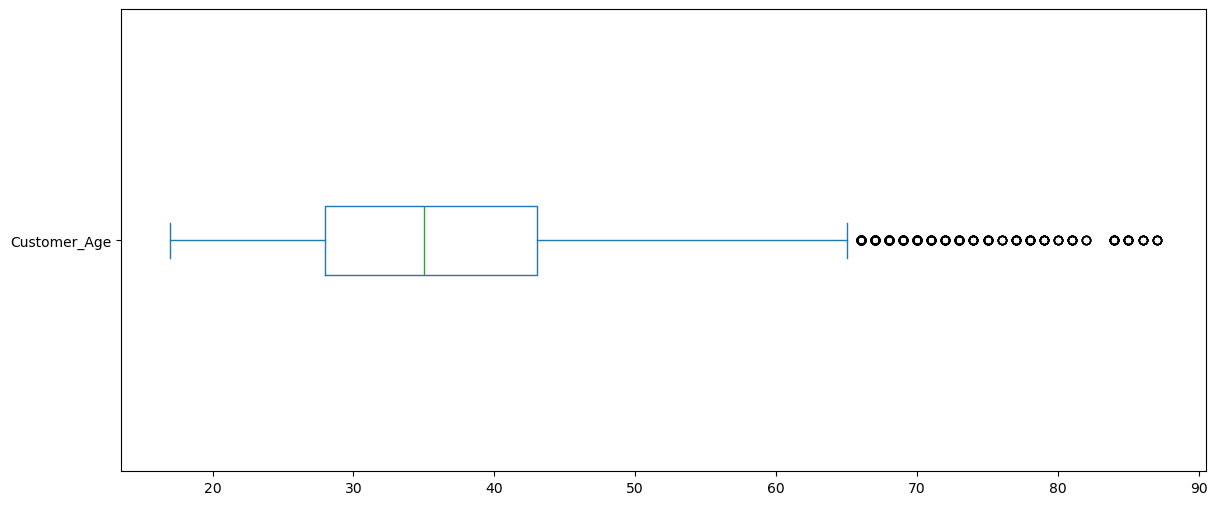

In [42]:
sales['Customer_Age'].plot(kind='box',vert=False,figsize=(14,6))
plt.show()

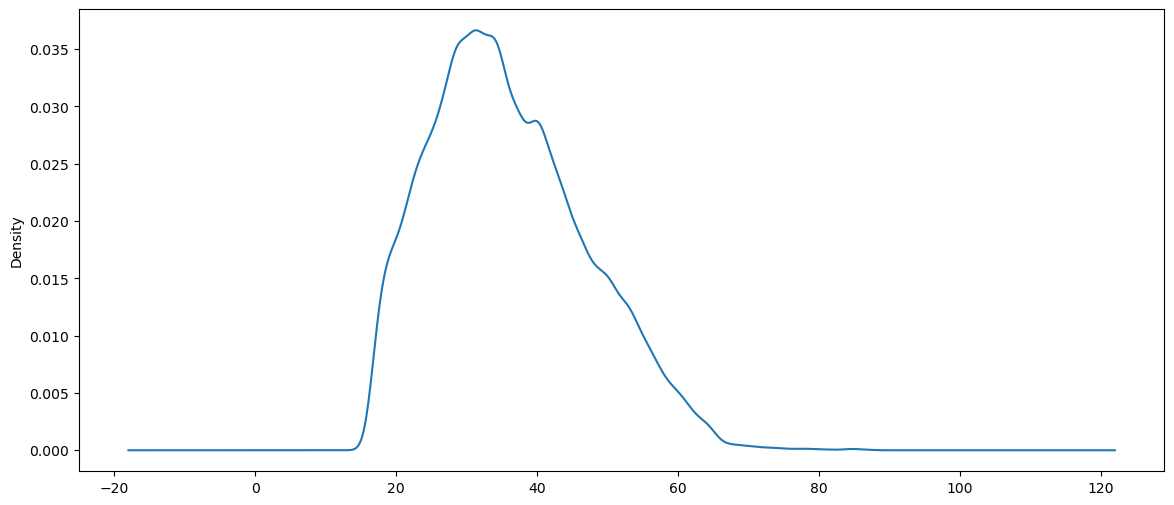

In [45]:
sales['Customer_Age'].plot(kind='kde',figsize=(14,6))
plt.show()

In [46]:
sales['Year'].value_counts()

Year
2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: count, dtype: int64

<hr style="border: none; height: 5px; background-color: blue;">

<h2 style="font-size:20px;font-weight:bold;">Can you see any relationship between 
<span style="background:gray;"><code>Unit_Cost</code></span> and  <span style="background:gray;"><code>Unit_Price</code></span> ? </h2>

In [48]:
sales['Month'].value_counts()

Month
June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: count, dtype: int64

<hr style="border: none; height: 5px; background-color: blue;">

<h2 style="font-size:18;">Can you see any relationship between
    <span style="background:gray;"><code>Order_Quantity</code></span> and <span style="background:gray;"><code>Profit</code></span>?</h2>

In [63]:
sales[['Order_Quantity', 'Profit']].corr()
# Negative Correlation

Order_Quantity    Profit
Order_Quantity        1.000000 -0.238863
Profit               -0.238863  1.000000

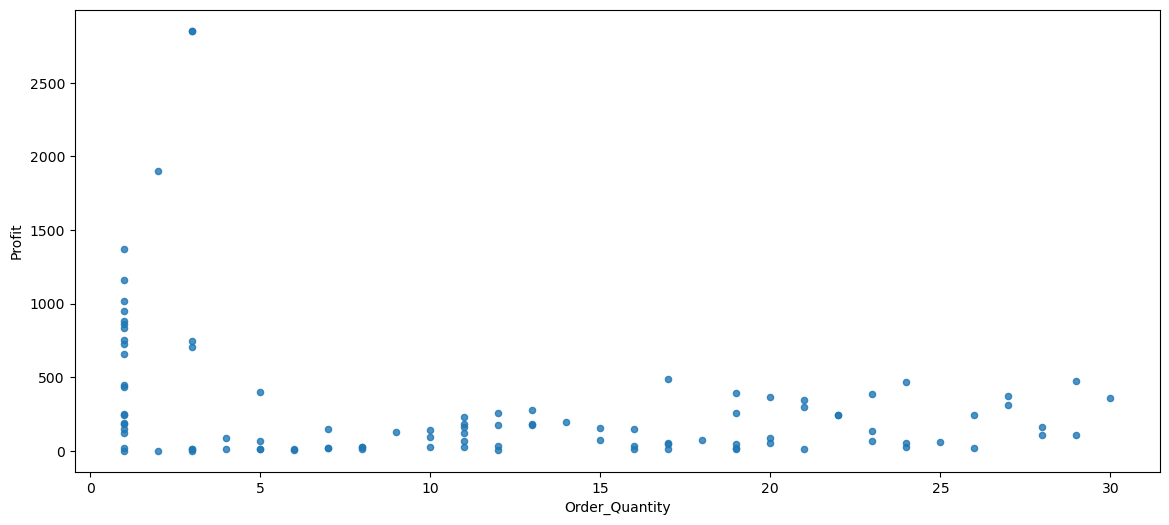

In [64]:
sales.sample(100,random_state=1).plot(kind='scatter', x='Order_Quantity', y='Profit',alpha=0.8,figsize=(14,6))
plt.show()

<hr style="border: none; height: 5px; background-color: blue;">


<h2 style="font-size:18;">Can you see any relationship between
    <span style="background:gray;"><code>Profit</code></span> and <span style="background:gray;"><code>Country</code></span>?</h2>

In [73]:
sales.groupby('Country')['Profit'].sum()

Country
Australia          6776030
Canada             3717296
France             2880282
Germany            3359995
United Kingdom     4413853
United States     11073644
Name: Profit, dtype: int64

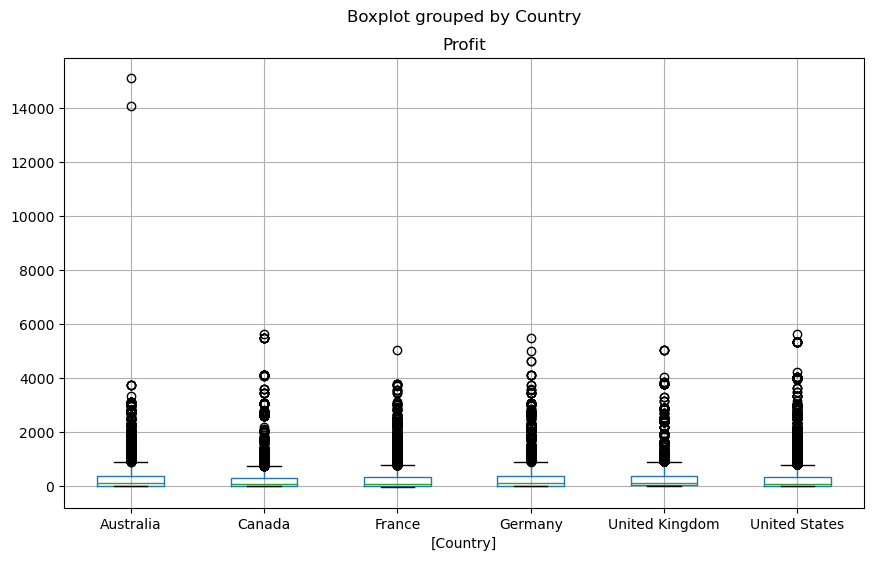

In [72]:
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))
plt.show()

In [76]:
sales['Calculated_Date'] = sales[['Year','Month','Day']].apply(lambda x : '{}-{}-{}'.format(x[0],x[1],x[2]),axis=1)
sales['Calculated_Date']= pd.to_datetime(sales['Calculated_Date'])
sales['Calculated_Date'].head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7472\2011521891.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sales['Calculated_Date'] = sales[['Year','Month','Day']].apply(lambda x : '{}-{}-{}'.format(x[0],x[1],x[2]),axis=1)


0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

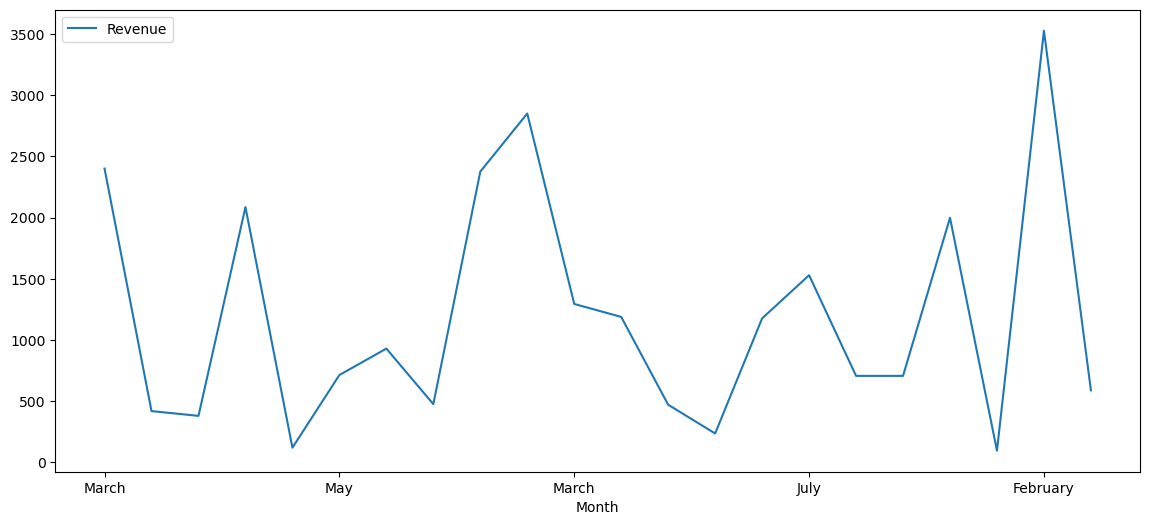

In [93]:
sales.head(100).loc[sales['Year']== 2014].plot(kind='line',x='Month',y='Revenue',figsize=(14,6))
plt.show()

<hr style="border: none; height: 5px; background-color: blue;">

<h2>How many Bike Racks orders were made from Canada?
</h2>

In [88]:
sales.loc[(sales['Country'] == 'Canada') |(sales['Sub_Category'] == 'Bike Rack')].shape[0]

14178

<hr style="border: none; height: 5px; background-color: blue;">

### How many orders were made in each region (state) of France?


In [95]:
france_states = sales.loc[sales['Country'] == 'France','State'].value_counts()
france_states

State
Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: count, dtype: int64

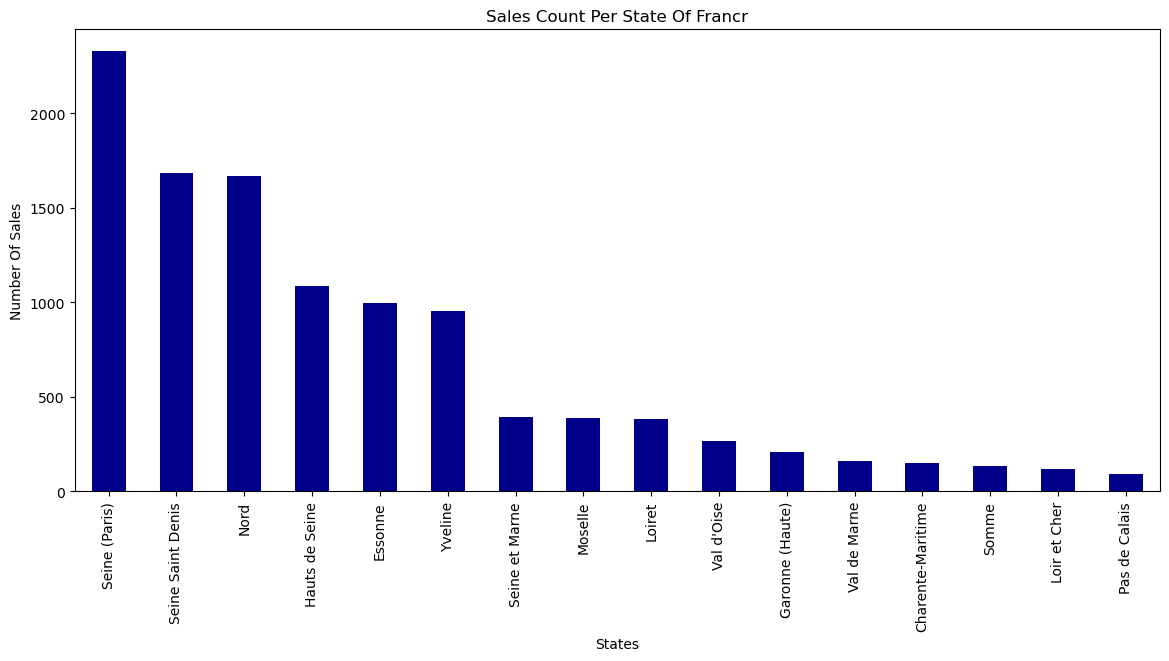

In [102]:
france_states.plot(kind='bar', figsize=(14,6),color='darkblue')
plt.title('Sales Count Per State Of Francr')
plt.xlabel('States')
plt.ylabel('Number Of Sales')
plt.show()

<hr style="border: none; height: 5px; background-color: blue;">

## How many orders were made per accessory sub-categories?


In [104]:
accessories = sales.loc[sales['Product_Category']== 'Accessories','Sub_Category'].value_counts()
accessories 

Sub_Category
Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: count, dtype: int64

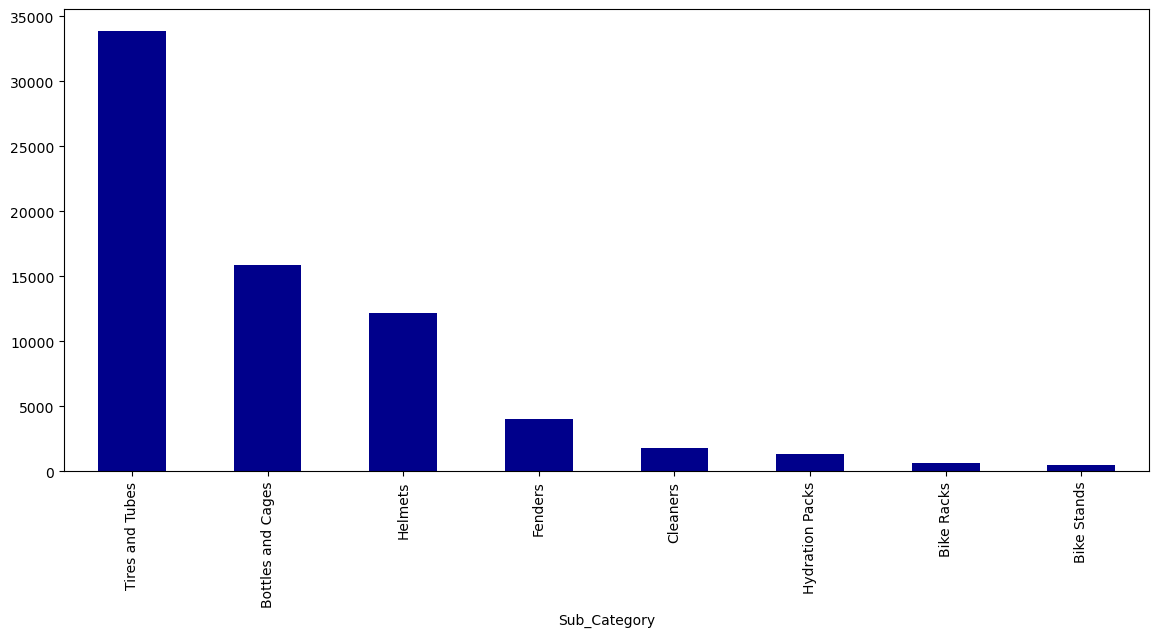

In [105]:
accessories.plot(kind='bar', figsize=(14,6),color='darkblue')
plt.show()

<hr style="border: none; height: 5px; background-color: blue;">

## How many orders were made per bike sub-categories?


In [117]:
bikes = sales.loc[sales['Product_Category'] == 'Bikes','Sub_Category'].value_counts()
bikes

Sub_Category
Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: count, dtype: int64

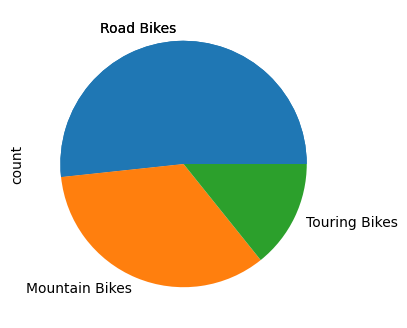

In [122]:
bikes.plot(kind='pie',figsize=(8,4))
plt.show()

In [130]:
def Gender(Gen):
    if Gen == 'M':
        return 'Male'
    else:
        return 'Female'

In [135]:
sales['Customer_Gender'].apply(Gender).value_counts()

Customer_Gender
Male      58312
Female    54724
Name: count, dtype: int64

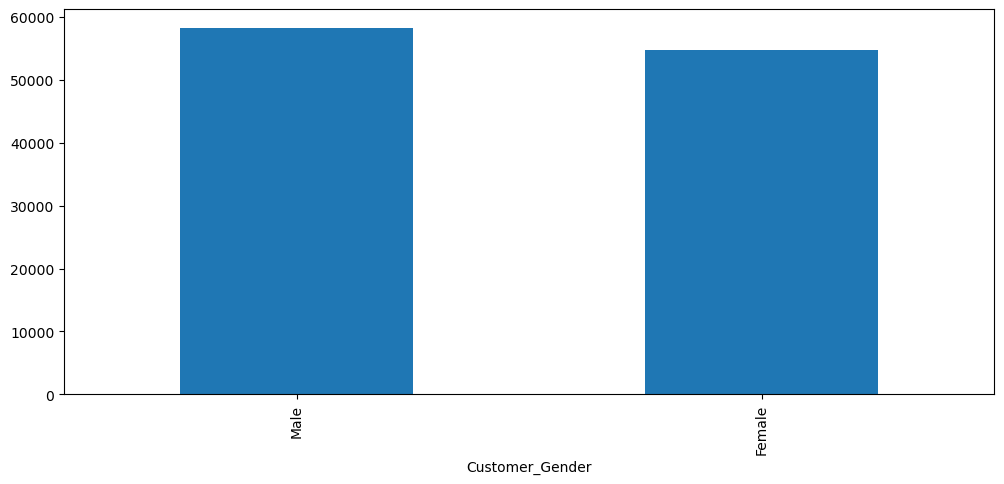

In [132]:
sales['Customer_Gender'].apply(Gender).value_counts().plot(kind='bar',figsize=(12,5))
plt.show()

<hr style="border: none; height: 5px; background-color: blue;">

## How many sales with more than 500 in **Revenue** were made by men?


In [140]:
sales.loc[(sales['Customer_Gender']=='M') & (sales['Revenue'] > 500) ].shape[0]

21773

<hr style="border: none; height: 5px; background-color: blue;">

## Get the ***top-5 sales*** with the highest revenue


In [147]:
sales.sort_values(['Revenue'], ascending= False ) .head()

Date  Day      Month  Year  Customer_Age       Age_Group  \
112073 2015-07-24   24       July  2015            52  Adults (35-64)   
112072 2013-07-24   24       July  2013            52  Adults (35-64)   
71129  2011-07-08    8       July  2011            22     Youth (<25)   
70307  2011-04-30   30      April  2011            44  Adults (35-64)   
70601  2011-09-30   30  September  2011            19     Youth (<25)   

       Customer_Gender    Country             State Product_Category  \
112073               M  Australia        Queensland         Clothing   
112072               M  Australia        Queensland         Clothing   
71129                M     Canada           Alberta            Bikes   
70307                M     Canada  British Columbia            Bikes   
70601                F     Canada  British Columbia            Bikes   

       Sub_Category                  Product  Order_Quantity  Unit_Cost  \
112073        Vests  Touring-1000 Yellow, 50              29       1482   
112072        Vests  Touring-1000 Yellow, 50              27       1482   
71129    Road Bikes         Road-150 Red, 48               4       2171   
70307    Road Bikes         Road-150 Red, 62               4       2171   
70601    Road Bikes         Road-150 Red, 62               4       2171   

        Unit_Price  Profit   Cost  Revenue Calculated_Date  
112073        2384   15096  42978    58074      2015-07-24  
112072        2384   14055  40014    54069      2013-07-24  
71129         3578    5628   8684    14312      2011-07-08  
70307         3578    5485   8684    14169      2011-04-30  
70601         3578    5485   8684    14169      2011-09-30

<hr style="border: none; height: 5px; background-color: blue;">

## What is the mean Order_Quantity of orders with more than 10K in revenue?


In [152]:
sales.loc[sales['Revenue']> 10000 , 'Order_Quantity'].mean()

np.float64(3.7218934911242605)

<hr style="border: none; height: 5px; background-color: blue;">

## How many orders were made in May of 2016?


In [155]:
sales.loc[(sales['Year'] == 2016) &(sales['Month'] == 'May')].shape[0]

5015

<hr style="border: none; height: 5px; background-color: blue;">

## How many orders were made between May and July of 2016?


In [158]:
cond = (sales['Year']== 2016 ) & (sales['Month'].isin(['May','June','July']))
sales.loc[cond].shape[0]

12164

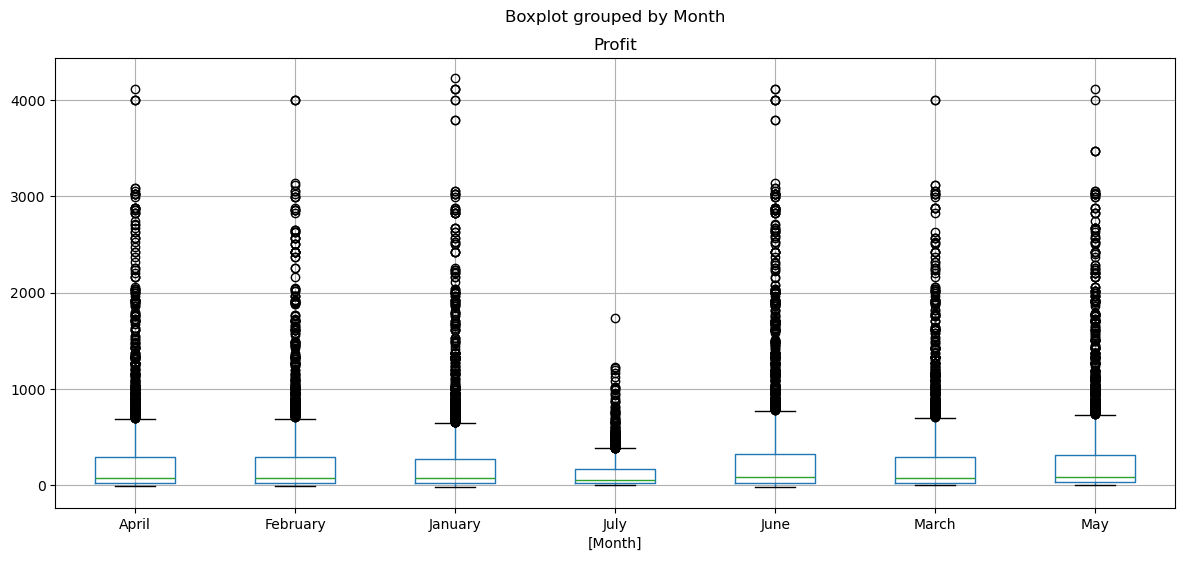

In [162]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]

profit_2016.boxplot(by='Month', figsize=(14,6))
plt.show()